In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import kruskal
from tabulate import tabulate
from statsmodels.stats.multitest import multipletests

## Exploratory Analysis of Disc Segmentation Features

Importing and structuring our final dataframe containing proper labeled columns

In [71]:
# import files of feature names from extracted PyRadiomics
radiomic_features = pd.read_csv('feature_names')

# import file containing compiled dataframe 
df = pd.read_csv('data_radiomics_discs.csv', index_col = 0)

In [72]:
df

0      1            2         3      4         5      6  \
S257_L1L2  120.0  383.0  305723010.0  3.956163  152.0  2.186922  493.0   
S257_L2L3  123.0  376.0  384935638.0  3.874380  154.0  1.996831  476.0   
S257_L3L4  123.3  383.7  364230616.0  3.937166  159.0  2.154622  543.0   
S257_L4L5  110.0  387.7  455828942.0  3.991499  180.0  1.922901  512.0   
S257_L5S1   82.0  230.0  124806211.0  3.204856   81.0  2.706499  354.0   
...          ...    ...          ...       ...    ...       ...    ...   
S255_L1L2   53.0  294.0  236383346.0  3.741681  155.0  2.280986  464.0   
S255_L2L3   58.0  290.0  245552408.0  3.705907  144.0  2.339691  518.0   
S255_L3L4   47.0  128.0   61328046.0  2.370598   46.0  2.674097  192.0   
S255_L4L5   41.0  134.0   71901047.0  2.522074   49.0  3.817889  254.0   
S255_L5S1   40.0  108.0   40264673.0  2.143671   35.0  3.633689  191.0   

                    7          8      9  ...         99        100  \
S257_L1L2  249.208899  81.760702  242.0  ...  29.675677  39.310413   
S257_L2L3  251.858271  80.943269  246.0  ...  29.823563  41.482689   
S257_L3L4  263.879843  82.974380  276.0  ...  46.212781  49.871468   
S257_L4L5  245.083879  90.670236  242.5  ...  46.576293  59.423545   
S257_L5S1  154.342196  45.757950  152.0  ...  29.792814  46.447758   
...               ...        ...    ...  ...        ...        ...   
S255_L1L2  163.168913  80.717062  147.0  ...  32.182766  43.837505   
S255_L2L3  163.659395  75.079014  150.0  ...  31.770002  43.753791   
S255_L3L4   85.589598  25.642933   83.0  ...  45.124985  59.937140   
S255_L4L5   82.433799  29.320692   76.0  ...  34.279001  46.903340   
S255_L5S1   72.726852  21.110352   69.0  ...  34.930580  40.712374   

                   101        102       103          104       105  \
S257_L1L2  4661.107590  26.859655  0.604318  2232.945286  0.479059   
S257_L2L3  5816.634415  27.071961  0.634382  2465.555427  0.423880   
S257_L3L4  4997.949113  25.073211  0.586323  2411.063185  0.482411   
S257_L4L5  6987.376395  33.607105  0.552238  3200.616007  0.458057   
S257_L5S1  5051.889586  25.401338  0.548533  2595.676216  0.513803   
...                ...        ...       ...          ...       ...   
S255_L1L2  7306.253037  29.047917  0.617587  2948.372632  0.403541   
S255_L2L3  7766.465632  28.200532  0.649284  2920.999131  0.376104   
S255_L3L4  8064.536008  30.601148  0.604735  3215.920021  0.398773   
S255_L4L5  9633.025957  28.996441  0.653069  3352.484923  0.348020   
S255_L5S1  7325.271980  29.225235  0.623860  2923.790767  0.399138   

                   106  Owestry score (ODI))  Pfirrman_degeneration_score  
S257_L1L2  4696.533236                   NaN                          2.0  
S257_L2L3  5851.418458                   NaN                          2.0  
S257_L3L4  5052.897819                   NaN                          2.0  
S257_L4L5  7054.698870                   NaN                          2.0  
S257_L5S1  5088.094321                   NaN                          3.0  
...                ...                   ...                          ...  
S255_L1L2  7345.070012                   NaN                          2.0  
S255_L2L3  7814.723336                   NaN                          2.0  
S255_L3L4  8120.492947                   NaN                          4.0  
S255_L4L5  9677.938161                   NaN                          3.0  
S255_L5S1  7364.868044                   NaN                          4.0  

[245 rows x 109 columns]

In [73]:
# locating the second column where feature names are 
names=radiomic_features.iloc[:,1]
feat_names_ls=list(names)

# setting up columns for dataframe
feat_names= feat_names_ls + ['ODI','Pfirrman_degeneration_score']

# import file containing compiled dataframe 
df=pd.read_csv('data_radiomics_discs.csv',index_col=0)

# replacing column numbers to names of features from radiomics 
df.set_axis(feat_names,axis=1,inplace=True)

In [74]:
# dropping first order features 
first_order_feat = list(np.array(feat_names_ls)[['firstorder' in feature for feature in feat_names_ls]])
df = df.drop(first_order_feat, axis=1)

# removing first orders from name list
for feature in first_order_feat:
    feat_names_ls.remove(feature)

### Checking dataframe information to prepare for analysis

In [75]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 245 entries, S257_L1L2 to S255_L5S1
Data columns (total 91 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   original_glcm_Autocorrelation                       245 non-null    float64
 1   original_glcm_ClusterProminence                     245 non-null    float64
 2   original_glcm_ClusterShade                          245 non-null    float64
 3   original_glcm_ClusterTendency                       245 non-null    float64
 4   original_glcm_Contrast                              245 non-null    float64
 5   original_glcm_Correlation                           245 non-null    float64
 6   original_glcm_DifferenceAverage                     245 non-null    float64
 7   original_glcm_DifferenceEntropy                     245 non-null    float64
 8   original_glcm_DifferenceVariance                    245 non-null    flo

Have a total of 90 columns, where two are label columns (ODI and pfirrman degneration score).

In [76]:
df['Pfirrman_degeneration_score'] = df['Pfirrman_degeneration_score'].astype('category')

In [77]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 245 entries, S257_L1L2 to S255_L5S1
Data columns (total 91 columns):
 #   Column                                              Non-Null Count  Dtype   
---  ------                                              --------------  -----   
 0   original_glcm_Autocorrelation                       245 non-null    float64 
 1   original_glcm_ClusterProminence                     245 non-null    float64 
 2   original_glcm_ClusterShade                          245 non-null    float64 
 3   original_glcm_ClusterTendency                       245 non-null    float64 
 4   original_glcm_Contrast                              245 non-null    float64 
 5   original_glcm_Correlation                           245 non-null    float64 
 6   original_glcm_DifferenceAverage                     245 non-null    float64 
 7   original_glcm_DifferenceEntropy                     245 non-null    float64 
 8   original_glcm_DifferenceVariance                    245 non-n

___________________________________________________________________________
## Visualizations

Checking the distribution of data for each degeneration score.

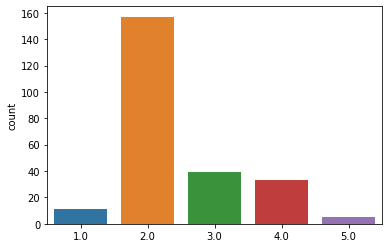

In [78]:
sns.countplot(x=df['Pfirrman_degeneration_score'].ravel())
plt.show()

In [79]:
print(df['Pfirrman_degeneration_score'].value_counts())
print(df['ODI'].count()/5)

2.0    157
3.0     39
4.0     33
1.0     11
5.0      5
Name: Pfirrman_degeneration_score, dtype: int64
15.0


Can see that in the Pfirrman degeneration score each ctageory at least has 5 values which means when it comes to train/test splitting we can conduct straified splitting. 

Also checked the ODI scoring count and found that in total there were 75 values counted that weren't NaN, had to divide by 5 to obtain the count of how many patients had pain scale done for them (if patient was given ODI scroring then scoring was repeated throughout all disc segments.

#### Box plot visual of degeneration score compared to radiomic features

original_glcm_Autocorrelation


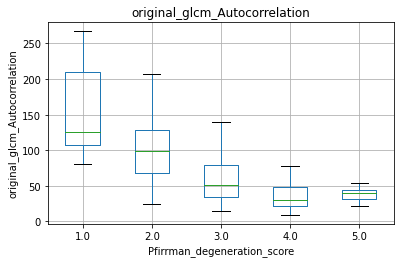

original_glcm_ClusterProminence


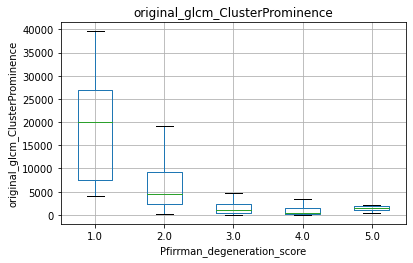

original_glcm_ClusterShade


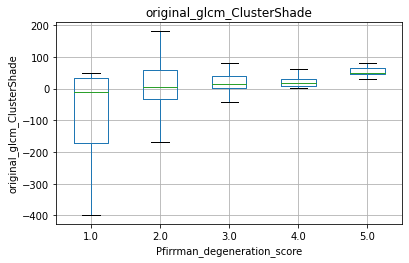

original_glcm_ClusterTendency


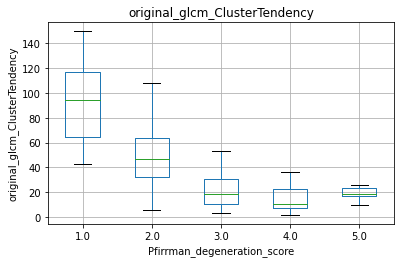

original_glcm_Contrast


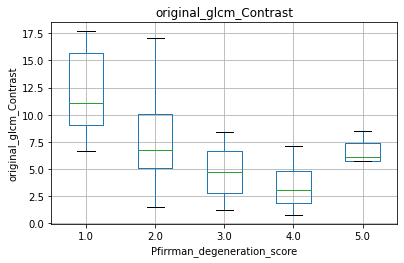

original_glcm_Correlation


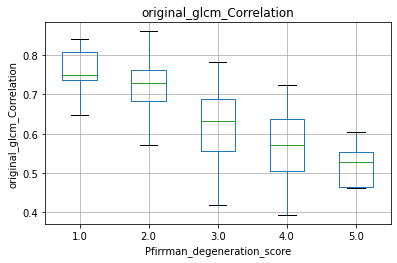

original_glcm_DifferenceAverage


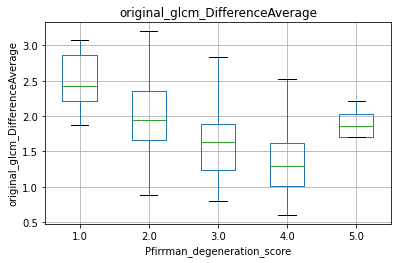

original_glcm_DifferenceEntropy


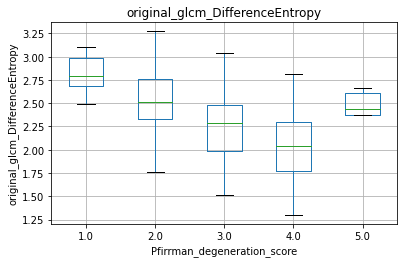

original_glcm_DifferenceVariance


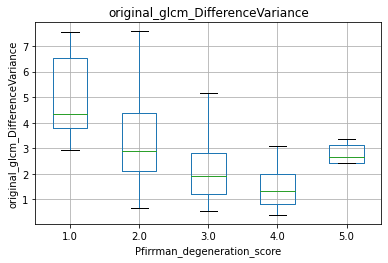

original_glcm_Id


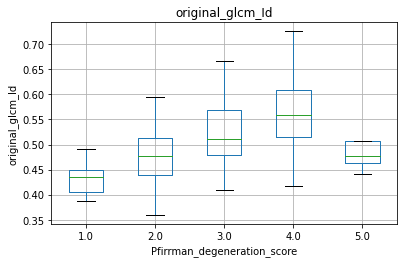

original_glcm_Idm


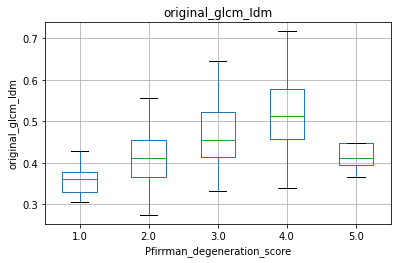

original_glcm_Idmn


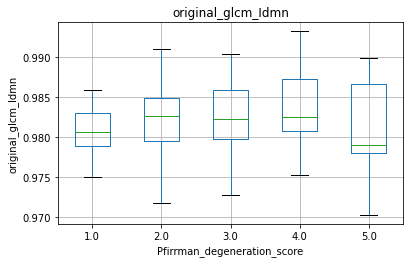

original_glcm_Idn


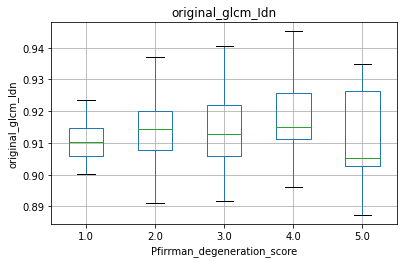

original_glcm_Imc1


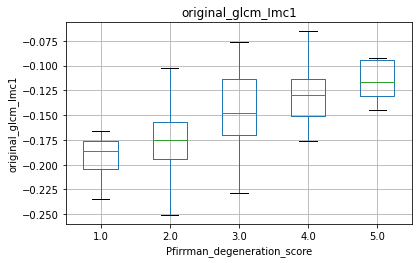

original_glcm_Imc2


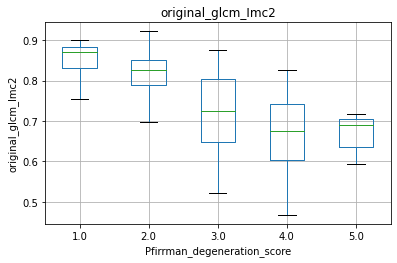

original_glcm_InverseVariance


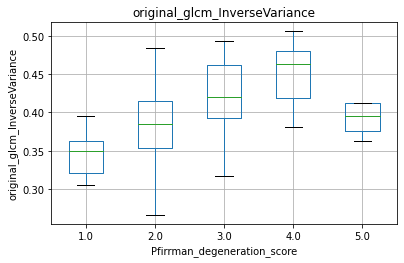

original_glcm_JointAverage


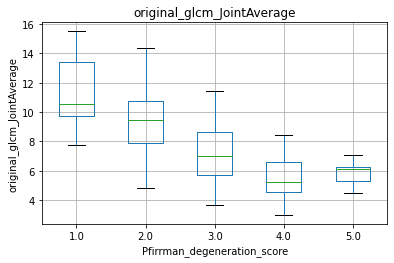

original_glcm_JointEnergy


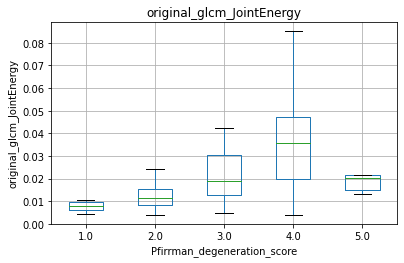

original_glcm_JointEntropy


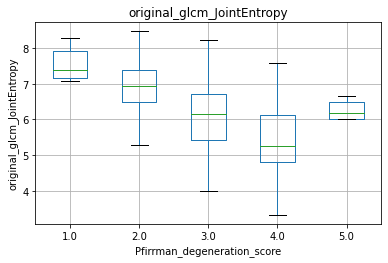

original_glcm_MCC


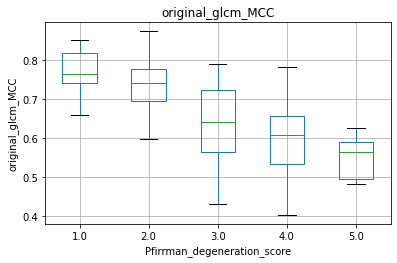

original_glcm_MaximumProbability


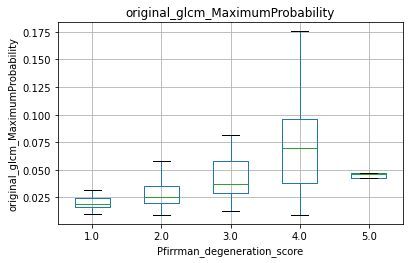

original_glcm_SumAverage


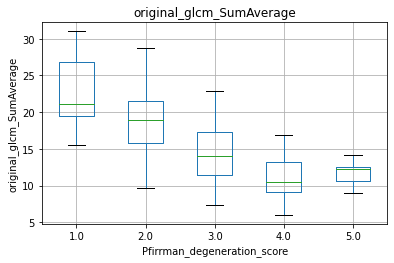

original_glcm_SumEntropy


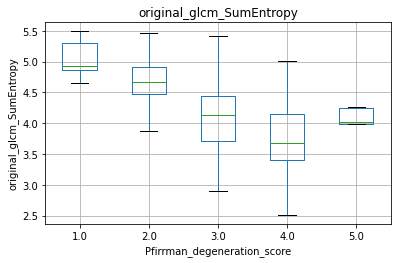

original_glcm_SumSquares


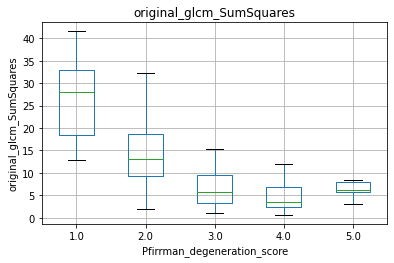

original_gldm_DependenceEntropy


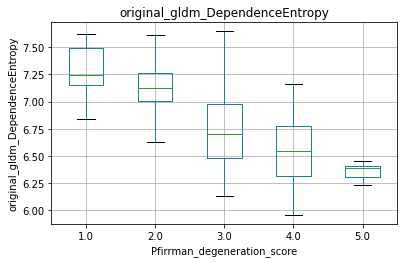

original_gldm_DependenceNonUniformity


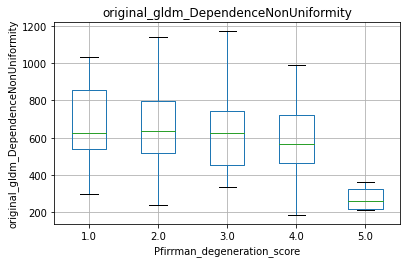

original_gldm_DependenceNonUniformityNormalized


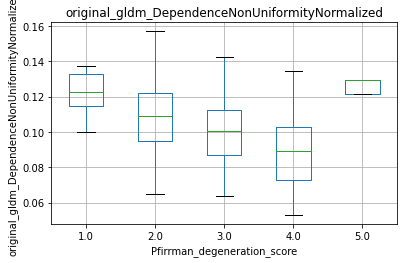

original_gldm_DependenceVariance


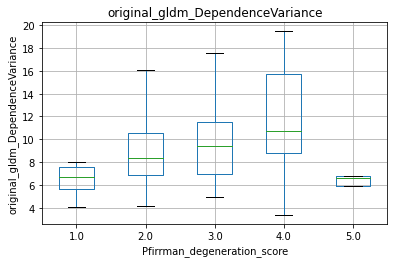

original_gldm_GrayLevelNonUniformity


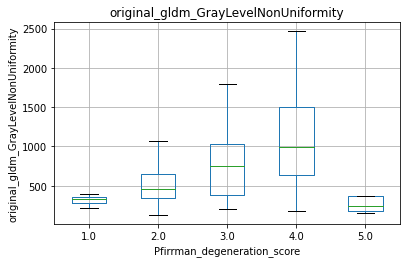

original_gldm_GrayLevelVariance


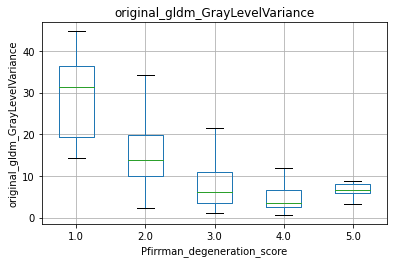

original_gldm_HighGrayLevelEmphasis


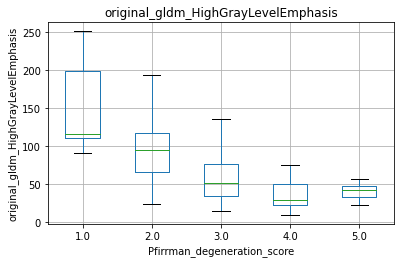

original_gldm_LargeDependenceEmphasis


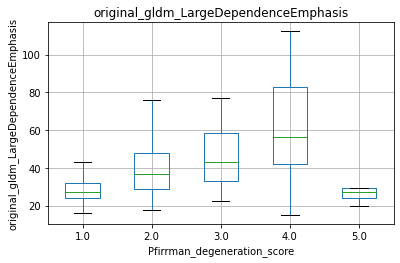

original_gldm_LargeDependenceHighGrayLevelEmphasis


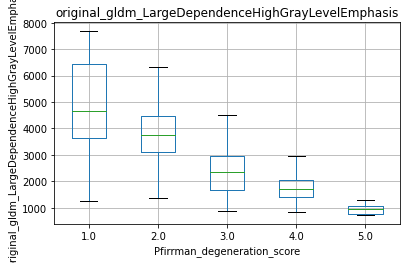

original_gldm_LargeDependenceLowGrayLevelEmphasis


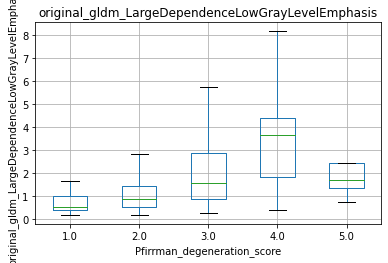

original_gldm_LowGrayLevelEmphasis


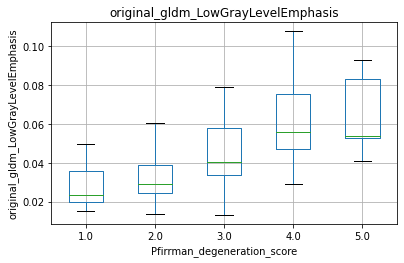

original_gldm_SmallDependenceEmphasis


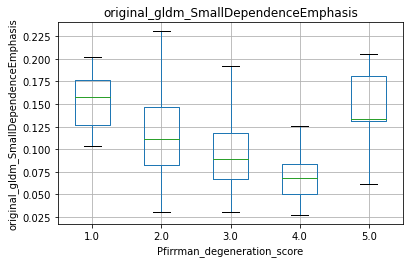

original_gldm_SmallDependenceHighGrayLevelEmphasis


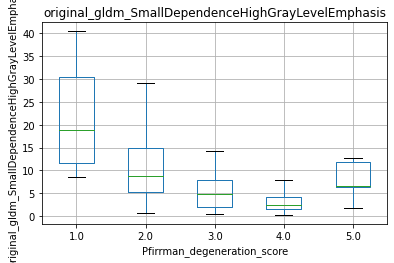

original_gldm_SmallDependenceLowGrayLevelEmphasis


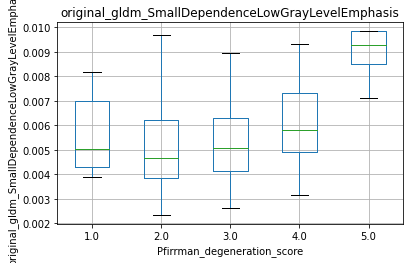

original_glrlm_GrayLevelNonUniformity


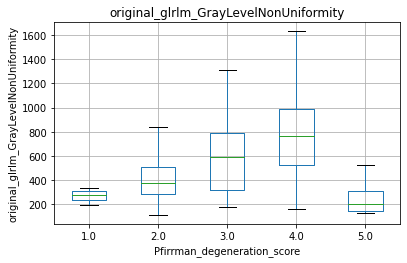

original_glrlm_GrayLevelNonUniformityNormalized


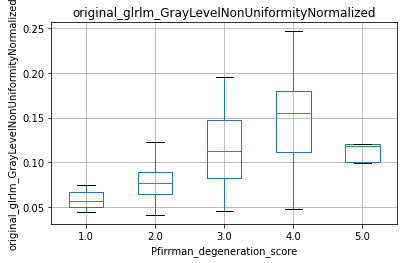

original_glrlm_GrayLevelVariance


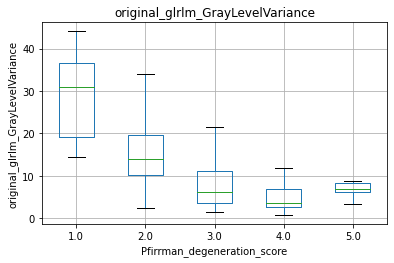

original_glrlm_HighGrayLevelRunEmphasis


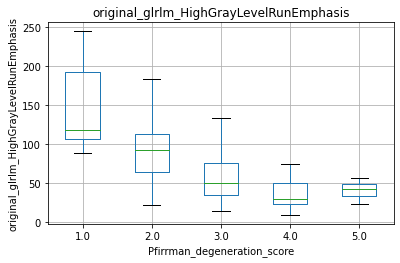

original_glrlm_LongRunEmphasis


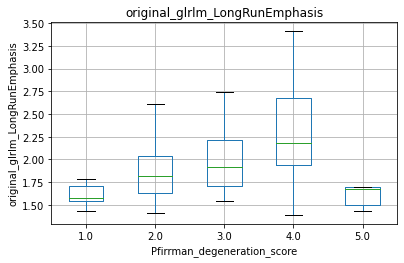

original_glrlm_LongRunHighGrayLevelEmphasis


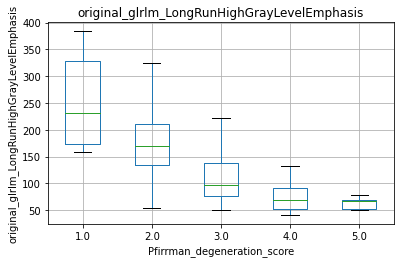

original_glrlm_LongRunLowGrayLevelEmphasis


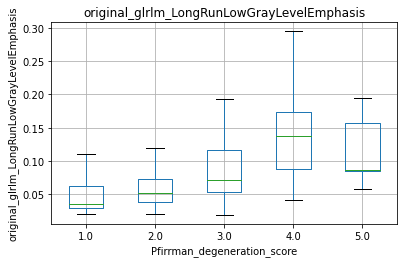

original_glrlm_LowGrayLevelRunEmphasis


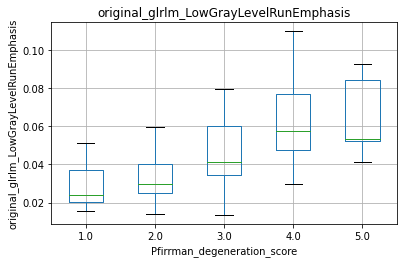

original_glrlm_RunEntropy


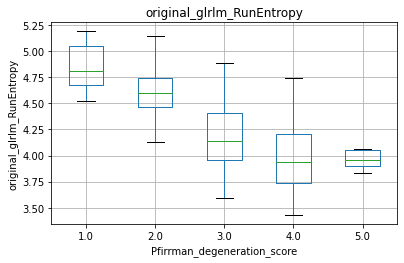

original_glrlm_RunLengthNonUniformity


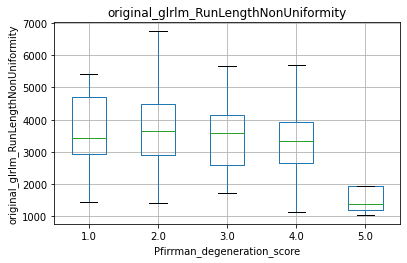

original_glrlm_RunLengthNonUniformityNormalized


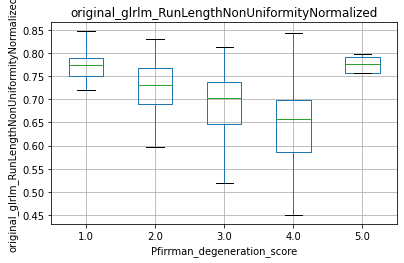

original_glrlm_RunPercentage


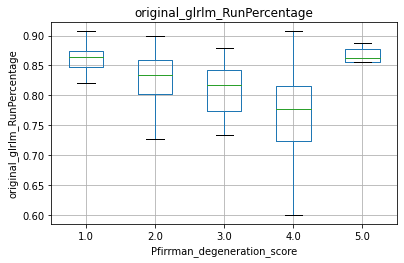

original_glrlm_RunVariance


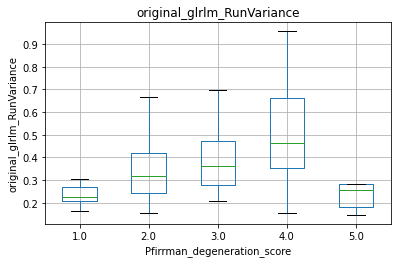

original_glrlm_ShortRunEmphasis


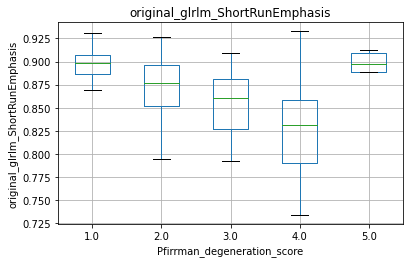

original_glrlm_ShortRunHighGrayLevelEmphasis


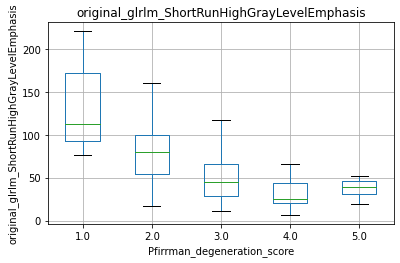

original_glrlm_ShortRunLowGrayLevelEmphasis


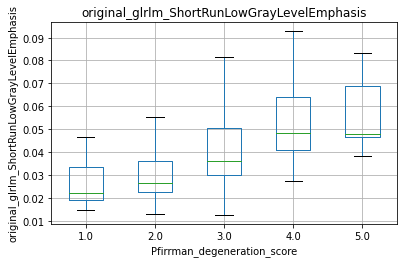

original_glszm_GrayLevelNonUniformity


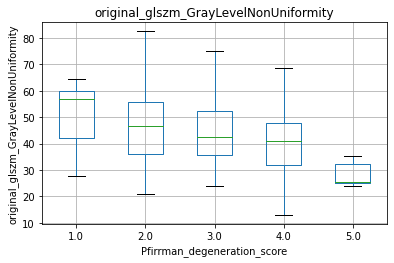

original_glszm_GrayLevelNonUniformityNormalized


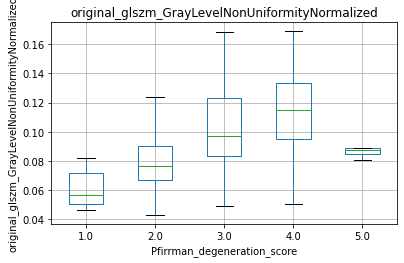

original_glszm_GrayLevelVariance


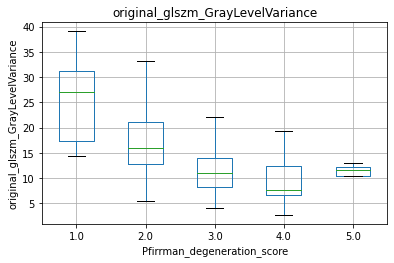

original_glszm_HighGrayLevelZoneEmphasis


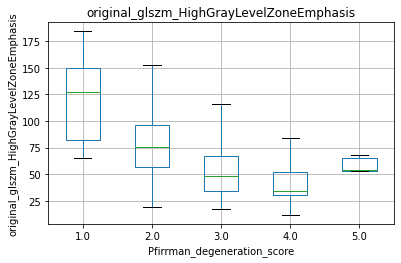

original_glszm_LargeAreaEmphasis


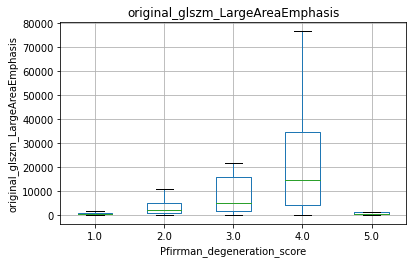

original_glszm_LargeAreaHighGrayLevelEmphasis


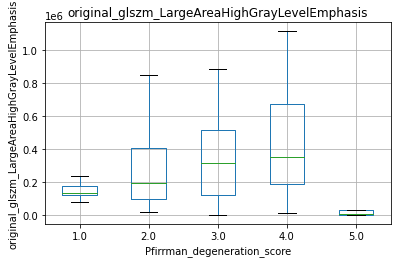

original_glszm_LargeAreaLowGrayLevelEmphasis


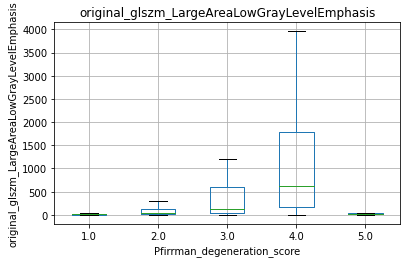

original_glszm_LowGrayLevelZoneEmphasis


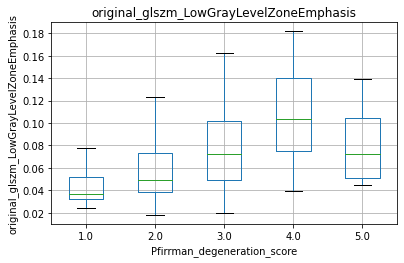

original_glszm_SizeZoneNonUniformity


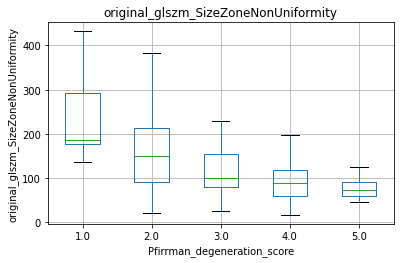

original_glszm_SizeZoneNonUniformityNormalized


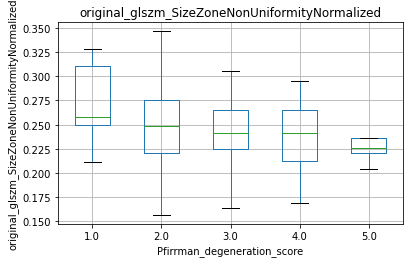

original_glszm_SmallAreaEmphasis


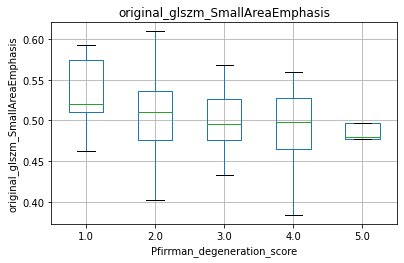

original_glszm_SmallAreaHighGrayLevelEmphasis


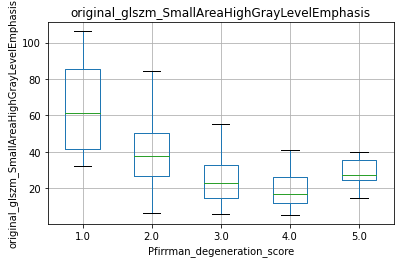

original_glszm_SmallAreaLowGrayLevelEmphasis


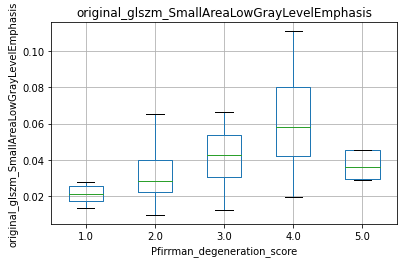

original_glszm_ZoneEntropy


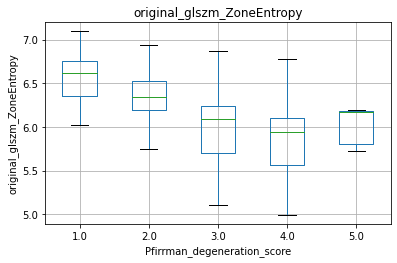

original_glszm_ZonePercentage


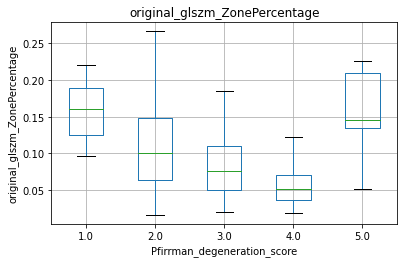

original_glszm_ZoneVariance


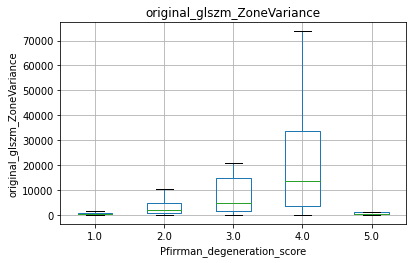

original_ngtdm_Busyness


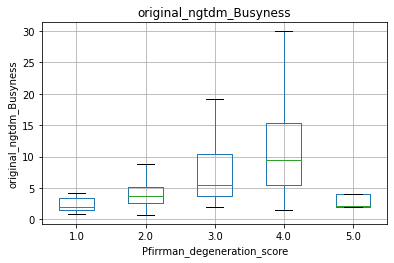

original_ngtdm_Coarseness


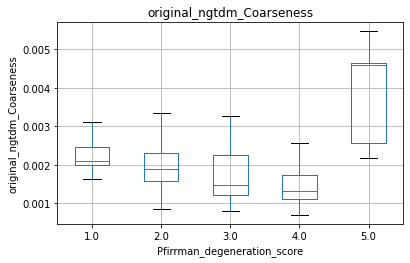

original_ngtdm_Complexity


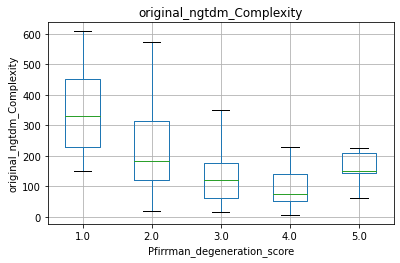

original_ngtdm_Contrast


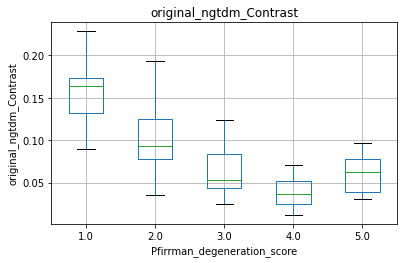

original_ngtdm_Strength


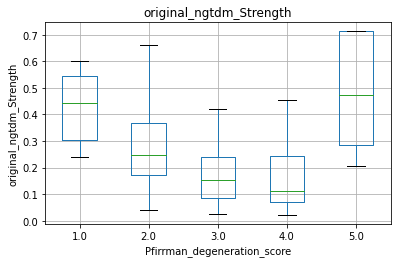

original_shape_Elongation


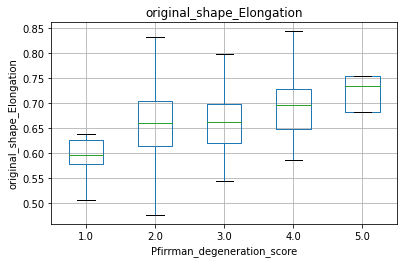

original_shape_Flatness


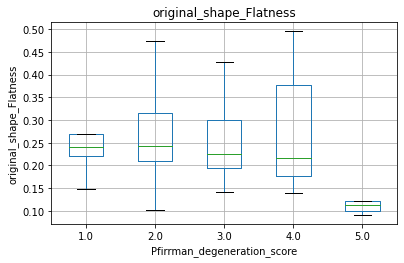

original_shape_LeastAxisLength


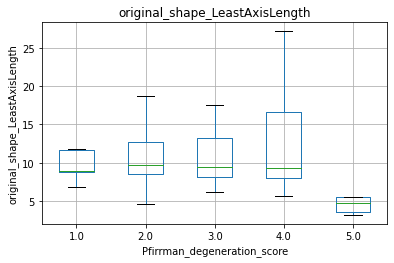

original_shape_MajorAxisLength


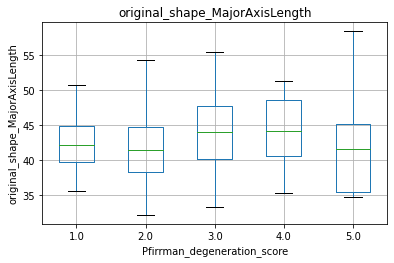

original_shape_Maximum2DDiameterColumn


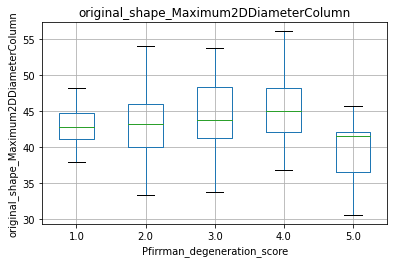

original_shape_Maximum2DDiameterRow


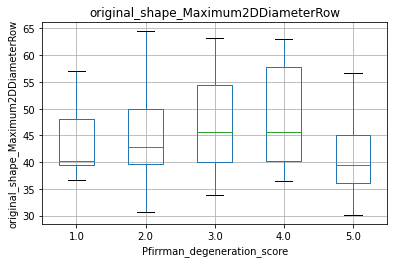

original_shape_Maximum2DDiameterSlice


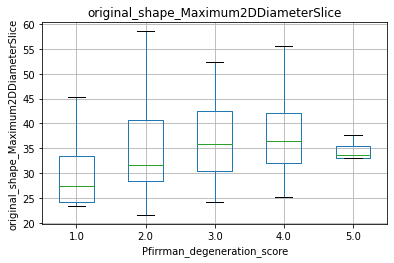

original_shape_Maximum3DDiameter


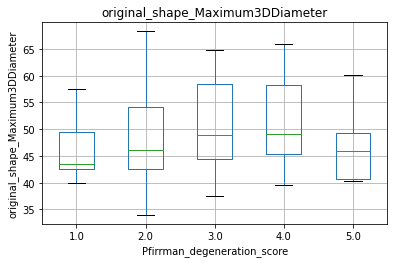

original_shape_MeshVolume


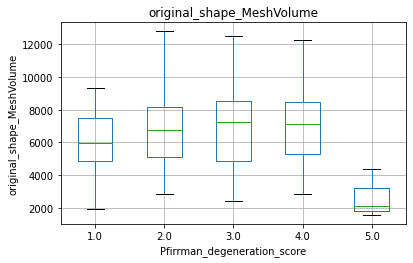

original_shape_MinorAxisLength


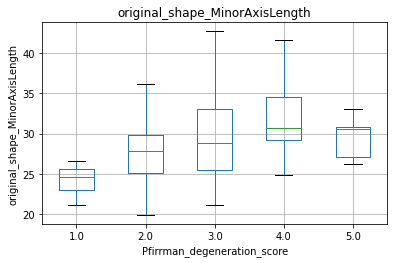

original_shape_Sphericity


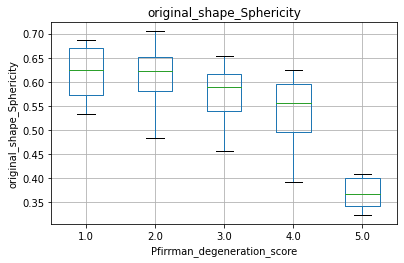

original_shape_SurfaceArea


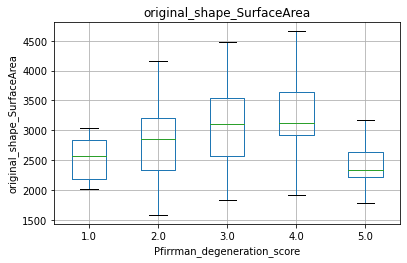

original_shape_SurfaceVolumeRatio


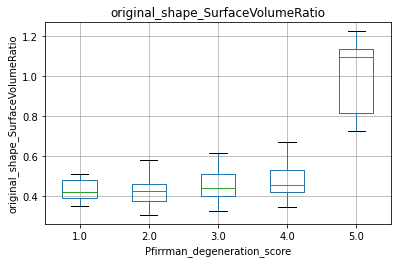

original_shape_VoxelVolume


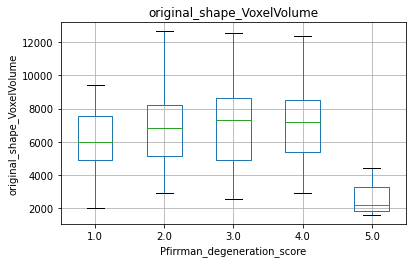

ODI


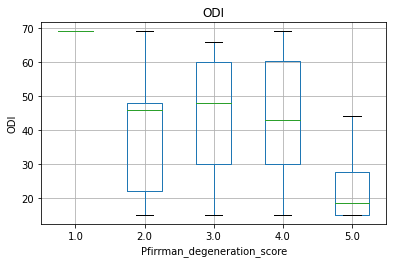

Pfirrman_degeneration_score


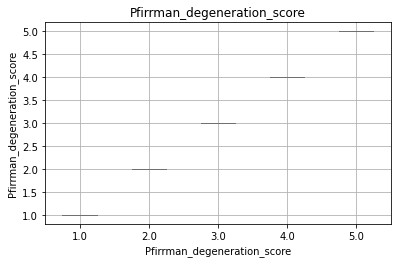

In [80]:
for feature in df.columns:
    print(feature)
    if feature != 'ODI' or feature != 'Pfirrman_degeneration_score':
        df.boxplot(column=feature, by='Pfirrman_degeneration_score',showfliers=False)
        # set main title and adjust spacing
        plt.suptitle("", y=1.05, fontsize=16)
    
        plt.ylabel(feature)
    
        # adjust plot layout to make room for title
        plt.subplots_adjust(top=0.9, bottom=0.2)
        plt.show()

___________________________________________________________________________
## Statistical testing

### Kruskal-Wallis Test

**Null Hypothesis:** all groups have the same median

**Alternative Hypothesis:** at least one group has a different median 

In [81]:
df_pyRadiomics = df[feat_names_ls+['Pfirrman_degeneration_score']]
df_pyRadiomics

original_glcm_Autocorrelation  original_glcm_ClusterProminence  \
S257_L1L2                     111.296851                      4756.707980   
S257_L2L3                     113.037025                      4069.617048   
S257_L3L4                     126.645611                      4976.006995   
S257_L4L5                     114.199430                      6593.579892   
S257_L5S1                      51.774386                       616.611142   
...                                  ...                              ...   
S255_L1L2                      66.255334                      5368.030712   
S255_L2L3                      65.262138                      4436.681004   
S255_L3L4                      16.785004                        71.789983   
S255_L4L5                      16.767737                       237.233736   
S255_L5S1                      12.962780                        51.138123   

           original_glcm_ClusterShade  original_glcm_ClusterTendency  \
S257_L1L2                   47.591537                      46.483350   
S257_L2L3                  -20.748793                      44.837706   
S257_L3L4                  -85.112179                      44.940829   
S257_L4L5                   -9.304604                      57.982414   
S257_L5S1                    8.659071                      15.050783   
...                               ...                            ...   
S255_L1L2                  130.369866                      49.468378   
S255_L2L3                  106.528280                      44.871838   
S255_L3L4                    4.485184                       5.230686   
S255_L4L5                   20.770725                       8.010672   
S255_L5S1                    4.914817                       3.742564   

           original_glcm_Contrast  original_glcm_Correlation  \
S257_L1L2               10.012959                   0.644451   
S257_L2L3                7.632997                   0.707248   
S257_L3L4                8.506414                   0.677561   
S257_L4L5                8.044605                   0.755136   
S257_L5S1                4.756510                   0.519309   
...                           ...                        ...   
S255_L1L2                5.271560                   0.806431   
S255_L2L3                4.070505                   0.832894   
S255_L3L4                1.343019                   0.590492   
S255_L4L5                1.418797                   0.700273   
S255_L5S1                1.281395                   0.491063   

           original_glcm_DifferenceAverage  original_glcm_DifferenceEntropy  \
S257_L1L2                         2.349255                         2.763512   
S257_L2L3                         2.018296                         2.596243   
S257_L3L4                         2.158185                         2.662461   
S257_L4L5                         2.137221                         2.629229   
S257_L5S1                         1.666981                         2.305804   
...                                    ...                              ...   
S255_L1L2                         1.659162                         2.338655   
S255_L2L3                         1.509628                         2.195686   
S255_L3L4                         0.840354                         1.587700   
S255_L4L5                         0.855514                         1.609365   
S255_L5S1                         0.808068                         1.556715   

           original_glcm_DifferenceVariance  original_glcm_Id  ...  \
S257_L1L2                          4.212962          0.434447  ...   
S257_L2L3                          3.345311          0.472601  ...   
S257_L3L4                          3.609006          0.453721  ...   
S257_L4L5                          3.232734          0.449521  ...   
S257_L5S1                          1.847716          0.496680  ...   
...                                     ...               ...  ...   
S255_L1L2    

In [82]:
# Getting category column
category = 'Pfirrman_degeneration_score'
categories = df[category].unique()

# Initializing a list to store resulting values of test
wallis_results = []

# Loop through each feature and perform the Kruskal-Wallis test
for feature_col in df_pyRadiomics.columns:
    if feature_col != category:
        groups = [df_pyRadiomics[df_pyRadiomics[category]==cat][feature_col] for cat in categories]
        h, p_val = kruskal(*groups)
        wallis_results.append([feature_col, h, p_val])

        
_, p_adjusted, _, alpha_corrected = multipletests([test[2] for test in wallis_results],method='bonferroni')
for x in range(len(p_adjusted)):
    wallis_results[x].append(p_adjusted[x])

print(tabulate(wallis_results, headers=['Feature', 'H-Statistic', 'P-Value', 'Adjusted P-Value']))
print('Corrected Alpha : ', alpha_corrected)

Feature                                               H-Statistic      P-Value    Adjusted P-Value
--------------------------------------------------  -------------  -----------  ------------------
original_glcm_Autocorrelation                            88.0677   3.38756e-18         3.01493e-16
original_glcm_ClusterProminence                          75.4066   1.63461e-15         1.4548e-13
original_glcm_ClusterShade                               11.5595   0.0209462           1
original_glcm_ClusterTendency                            86.8369   6.18258e-18         5.50249e-16
original_glcm_Contrast                                   51.5519   1.71154e-10         1.52327e-08
original_glcm_Correlation                                88.7182   2.46459e-18         2.19348e-16
original_glcm_DifferenceAverage                          51.4354   1.81023e-10         1.6111e-08
original_glcm_DifferenceEntropy                          52.0446   1.35015e-10         1.20164e-08
original_glcm_Differen

In [83]:
# Find the significant features using Bonferroni-corrected alpha
significant_features = []
for i, test in enumerate(wallis_results):
    if p_adjusted[i] < alpha_corrected and test[1] > 0:
        significant_features.append(test[0])

In [84]:
# Save the significant feature names in a list
significant_feature_willis = [test[0] for test in wallis_results if test[0] in significant_features]

### ANOVA Test

**Null Hypothesis:** the means of all groups are the same

**Alternative hypothesis:** there is at least one group mean that is different then the others.

In [28]:
from scipy.stats import f_oneway

In [85]:
# Initializing a list to store resulting values of test
anova_results = []

# Loop through each feature and perform the Kruskal-Wallis test
for feature_col in df_pyRadiomics.columns:
    if feature_col != category:
        groups = [df_pyRadiomics[df_pyRadiomics[category]==cat][feature_col] for cat in categories]
        f_stat, p_val = f_oneway(*groups)
        anova_results.append([feature_col, f_stat, p_val])

# Bonferroni implementation
_, p_adjusted, _, alpha_corrected = multipletests([test[2] for test in anova_results],method='bonferroni')
for x in range(len(p_adjusted)):
    anova_results[x].append(p_adjusted[x])

print(tabulate(wallis_results, headers=['Feature', 'H-Statistic', 'P-Value', 'Adjusted P-Value']))
print('Corrected Alpha : ', alpha_corrected)    

Feature                                               H-Statistic      P-Value    Adjusted P-Value
--------------------------------------------------  -------------  -----------  ------------------
original_glcm_Autocorrelation                            88.0677   3.38756e-18         3.01493e-16
original_glcm_ClusterProminence                          75.4066   1.63461e-15         1.4548e-13
original_glcm_ClusterShade                               11.5595   0.0209462           1
original_glcm_ClusterTendency                            86.8369   6.18258e-18         5.50249e-16
original_glcm_Contrast                                   51.5519   1.71154e-10         1.52327e-08
original_glcm_Correlation                                88.7182   2.46459e-18         2.19348e-16
original_glcm_DifferenceAverage                          51.4354   1.81023e-10         1.6111e-08
original_glcm_DifferenceEntropy                          52.0446   1.35015e-10         1.20164e-08
original_glcm_Differen

______________________________________________________________________________________________________________
Checking if corrected p-value for anova test is less thean the Bonferroni-corrected alpha level. If corrected p-value is less than corrected alpha, then null hypothesis can be rejected in favor of the alternative hypothesis and feature is considered statistically significant. 

In [86]:
significant_features_anova = []
for i, test in enumerate(anova_results):
    if p_adjusted[i] < alpha_corrected and test[2] > 0:
        significant_features.append(test[0])

In [87]:
# Save the significant feature names in a list
significant_feature_anova = [test[0] for test in anova_results if test[0] in significant_features]

Checking if statistical test (ANOVA and Willis) match in what was found to be a significant feature.

In [88]:
print(len(significant_feature_willis))
print(len(significant_feature_anova))

65
68


In [89]:
significant_feat = []
for willis in significant_feature_willis:
    for anova in significant_feature_anova:
        if willis == anova:
            significant_feat.append(willis)

In [90]:
len(significant_feat)

65

Filtering out dataframe of all features to only include the ones that were found to be significant

In [91]:
df_pyRadiomics = df_pyRadiomics[significant_feat]
df_pyRadiomics["ODI"] = df['ODI']
df_pyRadiomics['Pfirrman_degeneration_score'] = df['Pfirrman_degeneration_score']

/tmp/ipykernel_357652/2919693746.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pyRadiomics["ODI"] = df['ODI']
/tmp/ipykernel_357652/2919693746.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pyRadiomics['Pfirrman_degeneration_score'] = df['Pfirrman_degeneration_score']


In [92]:
df_pyRadiomics

original_glcm_Autocorrelation  original_glcm_ClusterProminence  \
S257_L1L2                     111.296851                      4756.707980   
S257_L2L3                     113.037025                      4069.617048   
S257_L3L4                     126.645611                      4976.006995   
S257_L4L5                     114.199430                      6593.579892   
S257_L5S1                      51.774386                       616.611142   
...                                  ...                              ...   
S255_L1L2                      66.255334                      5368.030712   
S255_L2L3                      65.262138                      4436.681004   
S255_L3L4                      16.785004                        71.789983   
S255_L4L5                      16.767737                       237.233736   
S255_L5S1                      12.962780                        51.138123   

           original_glcm_ClusterTendency  original_glcm_Contrast  \
S257_L1L2                      46.483350               10.012959   
S257_L2L3                      44.837706                7.632997   
S257_L3L4                      44.940829                8.506414   
S257_L4L5                      57.982414                8.044605   
S257_L5S1                      15.050783                4.756510   
...                                  ...                     ...   
S255_L1L2                      49.468378                5.271560   
S255_L2L3                      44.871838                4.070505   
S255_L3L4                       5.230686                1.343019   
S255_L4L5                       8.010672                1.418797   
S255_L5S1                       3.742564                1.281395   

           original_glcm_Correlation  original_glcm_DifferenceAverage  \
S257_L1L2                   0.644451                         2.349255   
S257_L2L3                   0.707248                         2.018296   
S257_L3L4                   0.677561                         2.158185   
S257_L4L5                   0.755136                         2.137221   
S257_L5S1                   0.519309                         1.666981   
...                              ...                              ...   
S255_L1L2                   0.806431                         1.659162   
S255_L2L3                   0.832894                         1.509628   
S255_L3L4                   0.590492                         0.840354   
S255_L4L5                   0.700273                         0.855514   
S255_L5S1                   0.491063                         0.808068   

           original_glcm_DifferenceEntropy  original_glcm_DifferenceVariance  \
S257_L1L2                         2.763512                          4.212962   
S257_L2L3                         2.596243                          3.345311   
S257_L3L4                         2.662461                          3.609006   
S257_L4L5                         2.629229                          3.232734   
S257_L5S1                         2.305804                          1.847716   
...                                    ...                               ...   
S255_L1L2                         2.338655                          2.324191   
S255_L2L3                         2.195686                          1.648796   
S255_L3L4                         1.587700                          0.611396   
S255_L4L5                         1.609365                          0.652388   
S255_L5S1                         1.556715                          0.595489   

           original_glcm_Id  original_glcm_Idm  ...  \
S257_L1L2          0.434447           0.359608  ...   
S257_L2L3          0.472601           0.405815  ...   
S257_L3L4          0.453721           0.382862  ...   
S257_L4L5          0.449521           0.376387  ...   
S257_L5S1          0.496680           0.433328  ...   
...                     ...                ...  ...   
S255_L1L2          0.513269           0.455575

Saving cleaned dataset

In [93]:
df_pyRadiomics.to_csv('data_radiomics_discs_fil.csv', index=True)